In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV



from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [2]:
df=  pd.read_csv('Voices_Cleaned.csv', index_col=0)

In [3]:
df= df.drop(columns=['date','age','user','pronounce'])

## 2- Second to model with  3 feature 'third_q' and 'kurtosis' and 'std'
I reach this as a temprory acceptable number of features, by trying different selection of features, but of course it could be improved!

In [125]:
model_features = ['third_q','kurtosis','std']

In [126]:
df.sex = df.sex.astype(int)

In [127]:
oversample = SMOTE(random_state=23)

In [128]:
def data_prepration(x): 
    x_features= x.loc[:,x.columns != "sex"]
    x_labels=x.loc[:,x.columns=="sex"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.2)
    print("length of training data")
    print(len(x_features_train))
    print("length of testing data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [129]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(df)

length of training data
4377
length of testing data
1095


In [130]:
columns = data_train_X.columns

In [131]:
os_data_X,os_data_y=oversample.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["sex"])

print("length of oversampled data is ",len(os_data_X))
print("Number of males in oversampled data",len(os_data_y[os_data_y["sex"]==0]))
print("No.of females in oversampled data",len(os_data_y[os_data_y["sex"]==1]))

length of oversampled data is  8112
Number of males in oversampled data 4056
No.of females in oversampled data 4056


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
scaler = StandardScaler()
scaler.fit(df.loc[:,model_features]) 
X_train = scaler.transform(os_data_X.loc[:,model_features])
X_test = scaler.transform(data_test_X.loc[:,model_features])
y_train = list(os_data_y['sex'].values)
y_test = list(data_test_y['sex'].values)

In [133]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=23).fit(X_train, y_train)
print('Decision Tree Report')
print('train score is %s' %tree.score(X_train, y_train))
print('test score is %s' %tree.score(X_test, y_test))



#Train random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=23).fit(X_train, y_train)
print('Random Forests Report')
print('train score is %s' %forest.score(X_train, y_train))
print('test score is %s' %forest.score(X_test, y_test))


#Train gradient boosting model
gb = GradientBoostingClassifier(random_state=23).fit(X_train, y_train)
print('Gradient Boosting Report')
print('train score is %s' %gb.score(X_train, y_train))
print('test score is %s' %gb.score(X_test, y_test))

Decision Tree Report
train score is 1.0
test score is 0.845662100456621
Random Forests Report
train score is 1.0
test score is 0.8703196347031964
Gradient Boosting Report
train score is 0.8317307692307693
test score is 0.782648401826484


In [134]:
def create_report(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    metrics_matrix=confusion_matrix(y_test,pred)
    print("the accuracy for this model is :",(metrics_matrix[0,0]+metrics_matrix[1,1])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the recall for this model is :",metrics_matrix[1,1]/(metrics_matrix[1,1]+metrics_matrix[1,0]))


    fig= plt.figure(figsize=(6,3))
    print("TP",metrics_matrix[1,1]) 
    print("TN",metrics_matrix[0,0]) 
    print("FP",metrics_matrix[0,1]) 
    print("FN",metrics_matrix[1,0])
    sns.heatmap(metrics_matrix,cmap="coolwarm",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_Sex")
    plt.ylabel("Real_Sex")
    plt.show()
    print("\n----------Classification Report----------")
    print(classification_report(y_test,pred))

the accuracy for this model is : 0.845662100456621
the recall for this model is : 0.4142857142857143
TP 29
TN 897
FP 128
FN 41


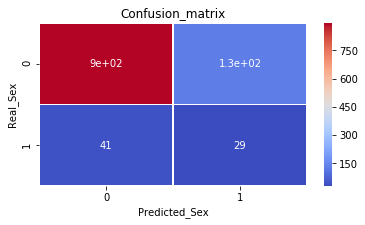


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      1025
           1       0.18      0.41      0.26        70

   micro avg       0.85      0.85      0.85      1095
   macro avg       0.57      0.64      0.58      1095
weighted avg       0.91      0.85      0.87      1095



In [135]:
create_report(DecisionTreeClassifier(random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.8703196347031964
the recall for this model is : 0.4857142857142857
TP 34
TN 919
FP 106
FN 36


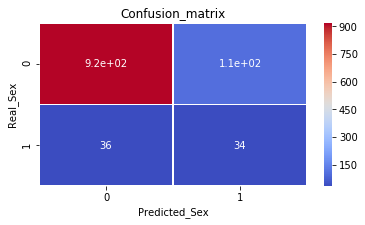


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1025
           1       0.24      0.49      0.32        70

   micro avg       0.87      0.87      0.87      1095
   macro avg       0.60      0.69      0.63      1095
weighted avg       0.92      0.87      0.89      1095



In [136]:
create_report(RandomForestClassifier(n_estimators=100,random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.782648401826484
the recall for this model is : 0.6
TP 42
TN 815
FP 210
FN 28


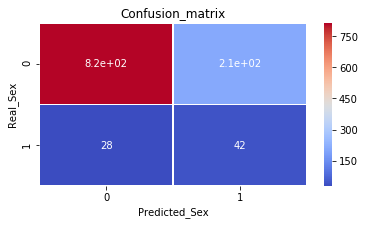


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.97      0.80      0.87      1025
           1       0.17      0.60      0.26        70

   micro avg       0.78      0.78      0.78      1095
   macro avg       0.57      0.70      0.57      1095
weighted avg       0.92      0.78      0.83      1095



In [137]:
create_report(GradientBoostingClassifier(random_state=23),X_train,X_test,y_train,y_test)

In [185]:
scores = ['f1']
parameters = {
    "loss":["exponential","deviance"],
    "learning_rate": [0.25,0.3],
    "min_samples_split": np.linspace(0.05, 0.5, 3),
    "min_samples_leaf": np.linspace(0.05, 0.5, 3),
    "max_depth":[5,7],
    "max_features":["log2"],
    "criterion": ["friedman_mse"],
    "subsample":[0.6],
    "n_estimators":[25,120]
    }

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,n_jobs=-1,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'criterion': 'friedman_mse', 'learning_rate': 0.3, 'loss': 'deviance', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 120, 'subsample': 0.6}

Grid scores on development set:

0.738 (+/-0.039) for {'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 25, 'subsample': 0.6}
0.782 (+/-0.026) for {'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.05, 'min_samples_split': 0.05, 'n_estimators': 120, 'subsample': 0.6}
0.723 (+/-0.023) for {'criterion': 'friedman_mse', 'learning_rate': 0.25, 'loss': 'exponential', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 0.05, 'min_samples_split': 0.275, 'n_estimators': 25, 'subsample': 